<a href="https://colab.research.google.com/github/whyhowie/wang_DSPN_S25/blob/main/ExerciseSubmissions/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Data cleansing

1. Loading Data 1/1
2. Data Cleansing 4/4
3. Data Manipulation with Tidyverse 4/4
4. Plotting Data 1/1

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data.

In [ ]:
# INSERT CODE HERE
# Install tidyverse
install.packages('tidyverse')
library(tidyverse)



The downloaded binary packages are in
	/var/folders/65/d95y8s0s2w12krlvqhv_nm200000gq/T//RtmpUIjaB6/downloaded_packages


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:

# If you are running this on your local computer, wet your workign directory to
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer.
setwd('/Users/hongyuw2/git-repo/wang_DSPN_S25/Homework datasets/lexDat')

# If you are running this on Colab, then use something like this.
# system("gdown --id 1wSvRPME5NimUDa0t3WqNSGzimLB1uNa7")


The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
## 2. Data Cleansing (4 points)

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive.

Write code that will copy the data to a new variable and make the above changes.

In [ ]:
# INSERT CODE HERE
lex <- read.csv('LexicalData_toclean.csv')
head(lex) # Original "dirty" data

# 1. Get rid of the commas in the reaction time values, and make this variable numeric
# Replace comma with period
lex$D_RT <- gsub(",", "", lex$D_RT)
# Cast into numerical values
lex$D_RT <- as.numeric(lex$D_RT)

# 2. Get rid of rows where the reaction times are missing
lex <- filter(lex, D_RT >= 0)

# 3. Check if All positive
if (all(lex$D_RT > 0)) {
    print("The D_RT column contains all positive values.")
    head(lex)
} else {
    print("Something is wrong!")
}



,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


[1] "The D_RT column contains all positive values."


,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,1094,refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing.

> *Write your response here.*
> * First action: syntactical anomaly -- domain format errors
> * Second action: coverage anomaly -- missing values
> * Third action: semantic anomaly -- integrity constraint violations

---
## 3. Data Manipulation with Tidyverse (4 points)

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells.

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [ ]:
# INSERT CODE HERE
lex |> # Note: https://style.tidyverse.org/pipes.html
    summarize(sampleSize=length(D_RT), mean=mean(D_RT), sd=sd(D_RT))


sampleSize,mean,sd
<int>,<dbl>,<dbl>
62607,807.2667,377.4396


Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one.

In [ ]:
# INSERT CODE HERE
lex |> # https://style.tidyverse.org/pipes.html#assignment
    mutate(Trial0 = Trial - 1) ->
    lex

head(lex)


,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Trial0
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,157,1,1,710,browse,false,-0.437,0
2,67,1,1,1094,refrigerant,false,0.825,0
3,120,1,1,587,gaining,false,-0.645,0
4,21,1,1,984,cheerless,false,0.025,0
5,236,1,1,577,pattered,false,-0.763,0
6,236,2,1,715,conjures,false,-0.364,1


---
## 4. Plotting Data (1 point)

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

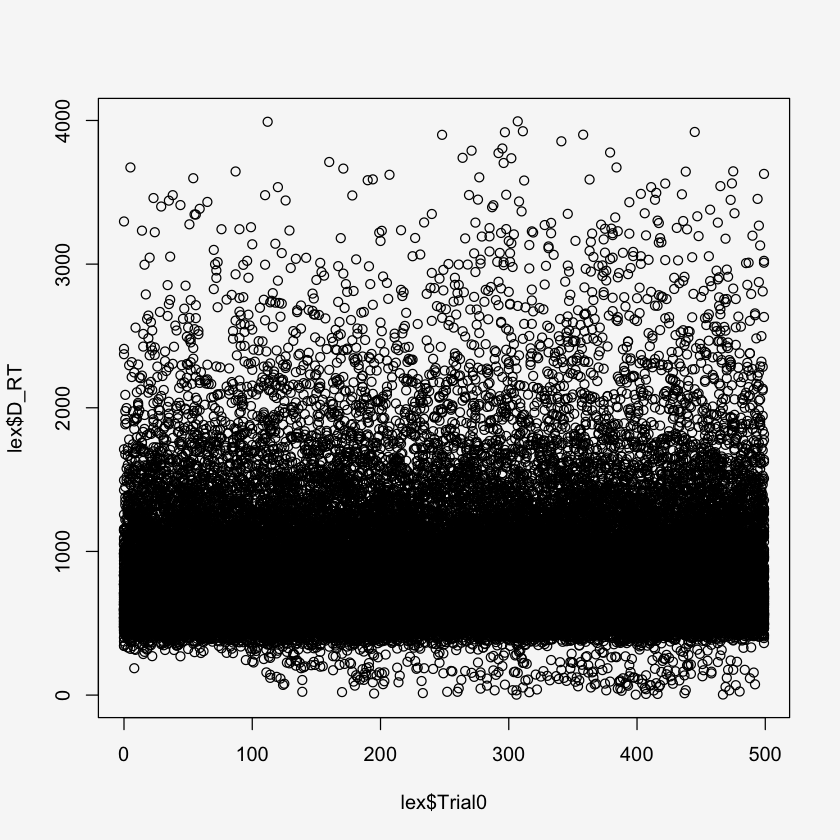

In [ ]:
# INSERT CODE HERE
par(bg = "#f7f7f7") # Force background color
plot(lex$Trial0, lex$D_RT)


That's all for this assignment! When you are finished, save the notebook as Exercise4.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas.

**DUE:** 5pm EST, Feb 10, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*